In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder , LabelEncoder , StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import accuracy_score , confusion_matrix , classification_report, mean_absolute_error , mean_squared_error

In [61]:
df=pd.read_csv('tested.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [62]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,0.363636,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.481622,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


In [64]:
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,86
SibSp,0
Parch,0
Ticket,0
Fare,1


In [65]:
df.drop(['Cabin'] , axis=1 , inplace=True)

In [66]:
df.fillna(df['Age'].mean() , inplace=True)

In [67]:
df.fillna(df['Fare'].mean(), inplace =True)

In [68]:
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


In [69]:
df.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
...,...
413,False
414,False
415,False
416,False


In [70]:
df.shape

(418, 11)

In [89]:
x=df.drop(['Survived'] , axis=1)
y=df['Survived']

In [90]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,0,3,1,34.5,0,0,152,7.8292,1
1,893,1,3,0,47.0,1,0,221,7.0000,2
2,894,0,2,1,62.0,0,0,73,9.6875,1
3,895,0,3,1,27.0,0,0,147,8.6625,2
4,896,1,3,0,22.0,1,1,138,12.2875,2


In [73]:
df['Embarked'].value_counts()

,count
Embarked,
S,270
C,102
Q,46


In [74]:
label=LabelEncoder()


In [75]:
df['Sex']=label.fit_transform(df['Sex'])

In [76]:
df['Embarked']=label.fit_transform(df['Embarked'])

In [77]:
df.drop('Name', inplace =True , axis=1)

In [78]:
df

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,0,3,1,34.50000,0,0,330911,7.8292,1
1,893,1,3,0,47.00000,1,0,363272,7.0000,2
2,894,0,2,1,62.00000,0,0,240276,9.6875,1
3,895,0,3,1,27.00000,0,0,315154,8.6625,2
4,896,1,3,0,22.00000,1,1,3101298,12.2875,2
...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,1,30.27259,0,0,A.5. 3236,8.0500,2
414,1306,1,1,0,39.00000,0,0,PC 17758,108.9000,0
415,1307,0,3,1,38.50000,0,0,SOTON/O.Q. 3101262,7.2500,2
416,1308,0,3,1,30.27259,0,0,359309,8.0500,2


In [79]:
df['Ticket']=label.fit_transform(df['Ticket'])

<Axes: >

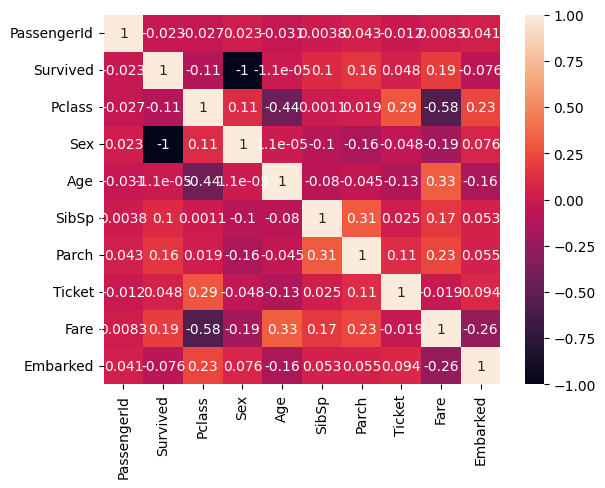

In [80]:
sns.heatmap(df.corr() , annot=True)

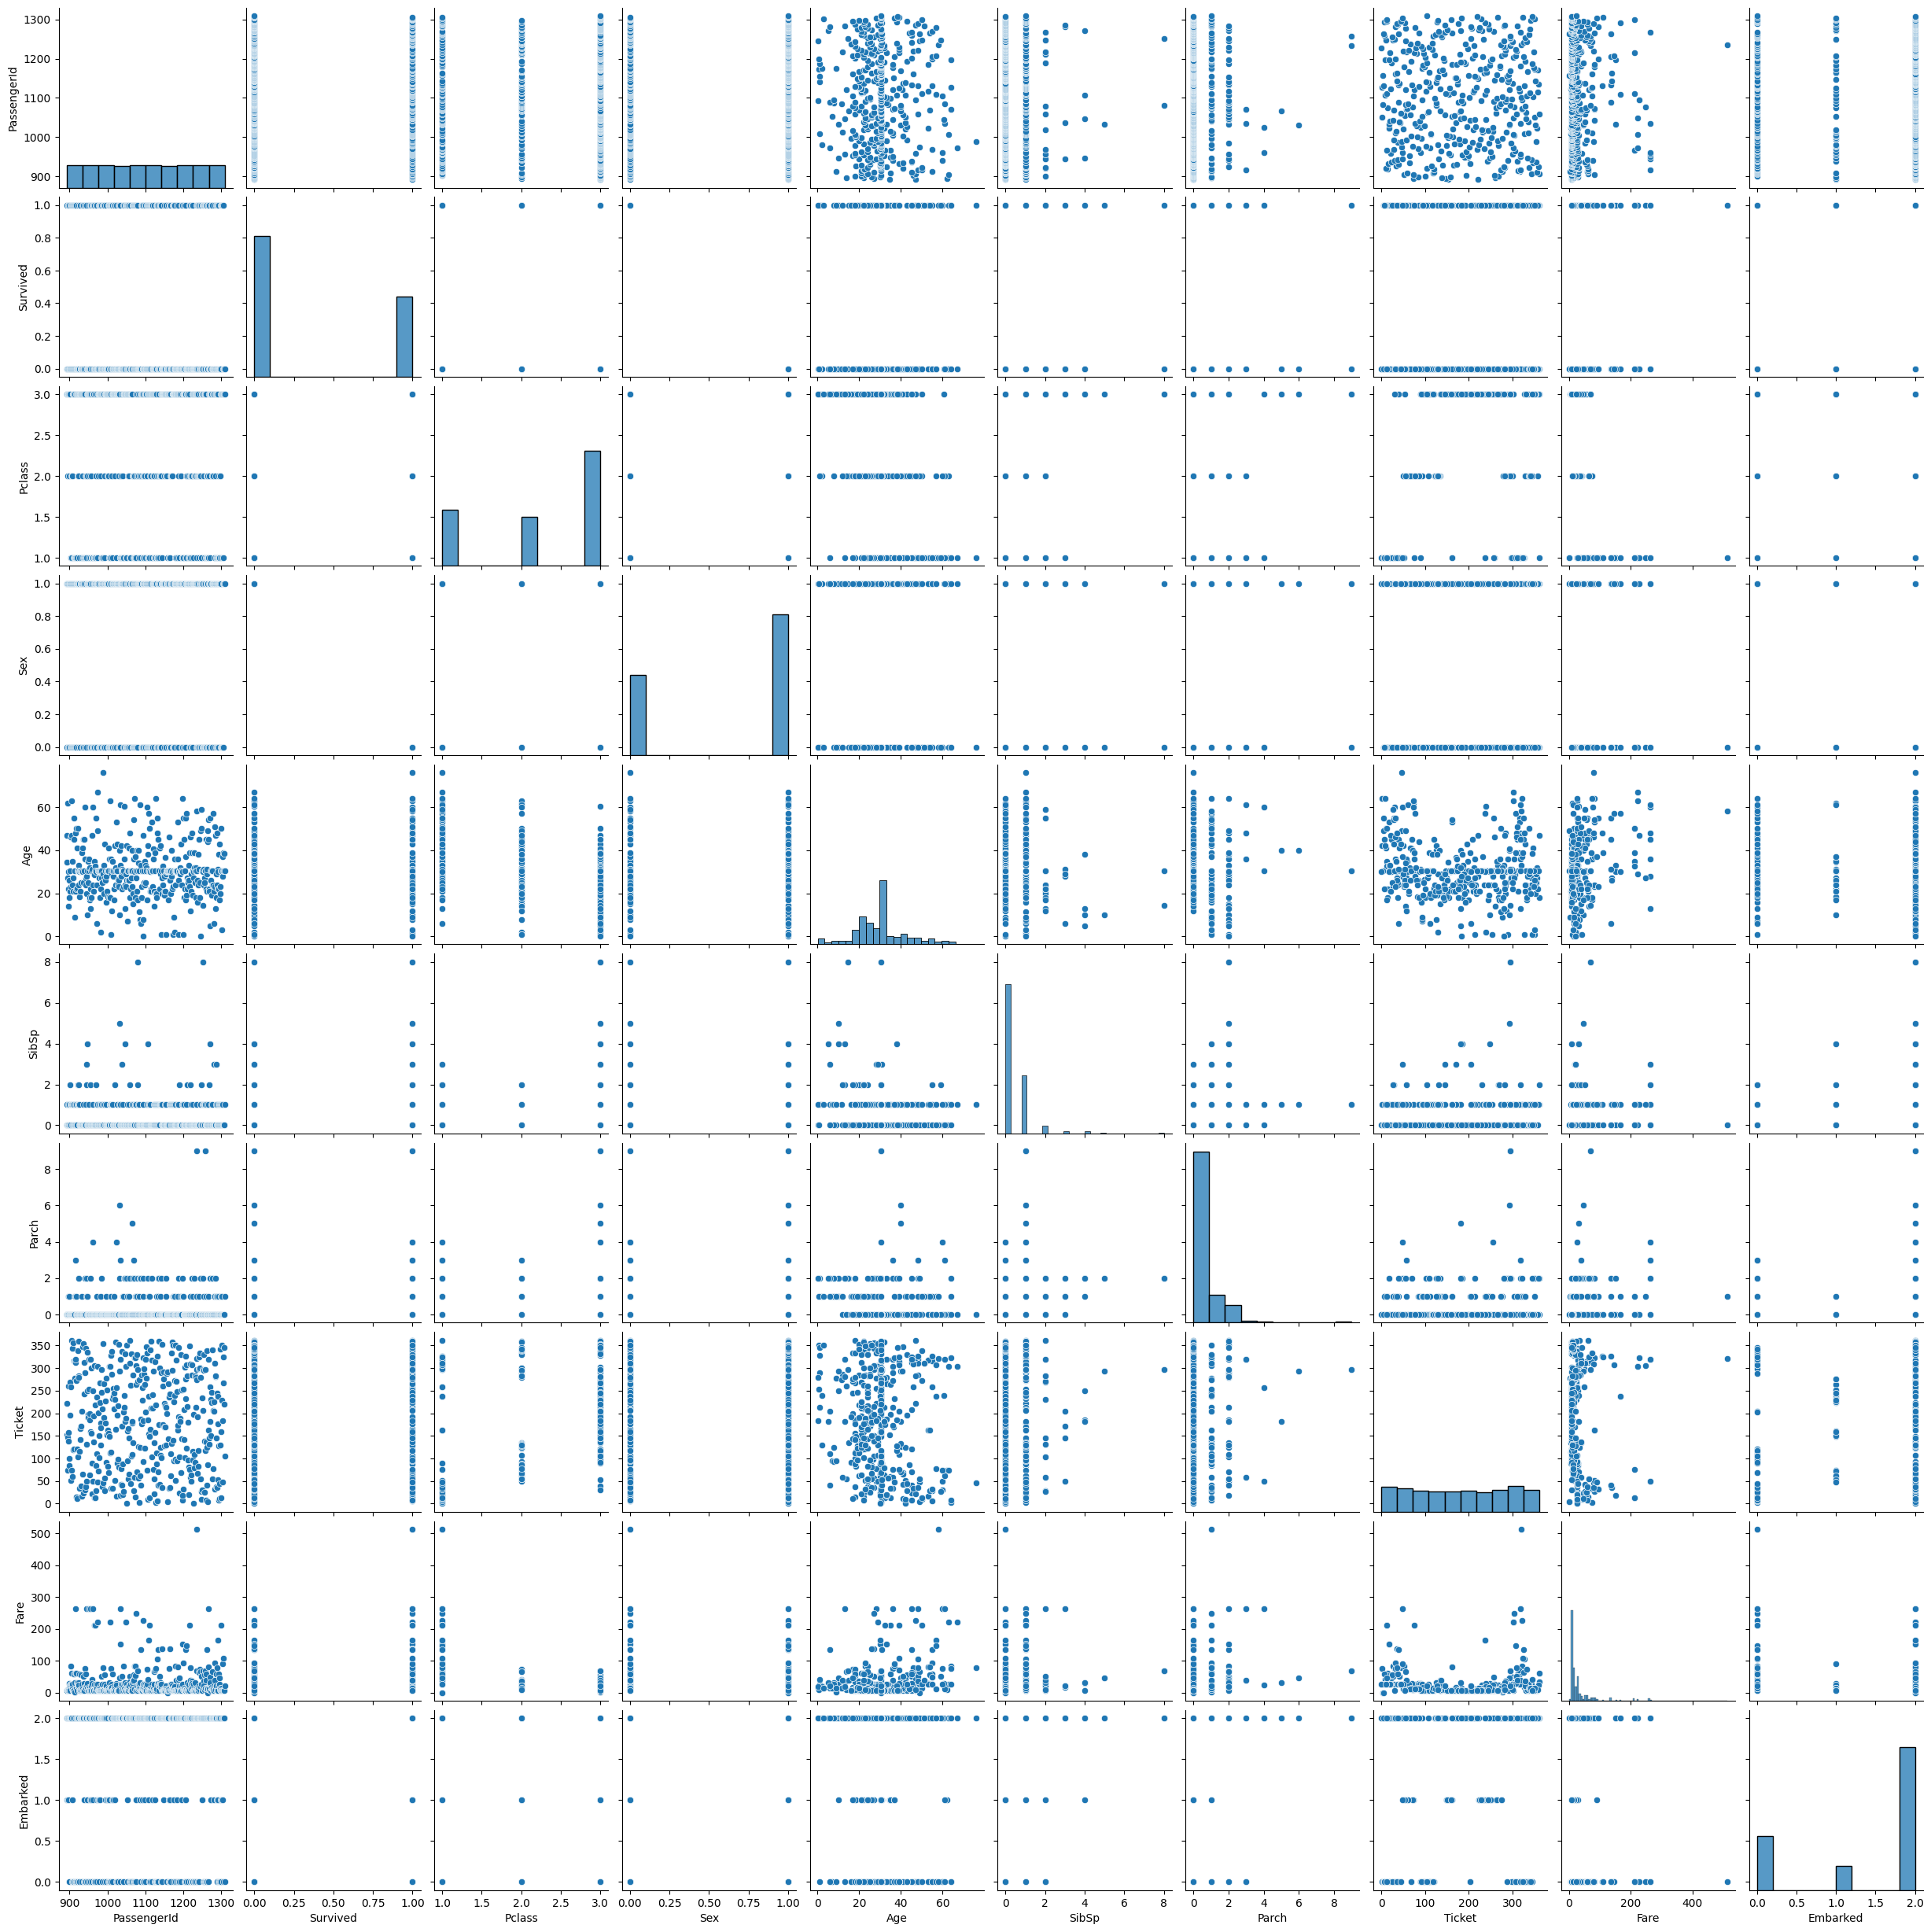

In [81]:
sns.pairplot(df)

<Axes: ylabel='count'>

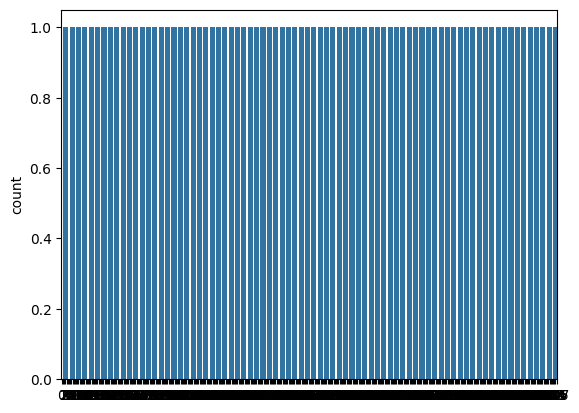

In [82]:
sns.countplot(df['Survived'])

<Axes: xlabel='Survived', ylabel='Age'>

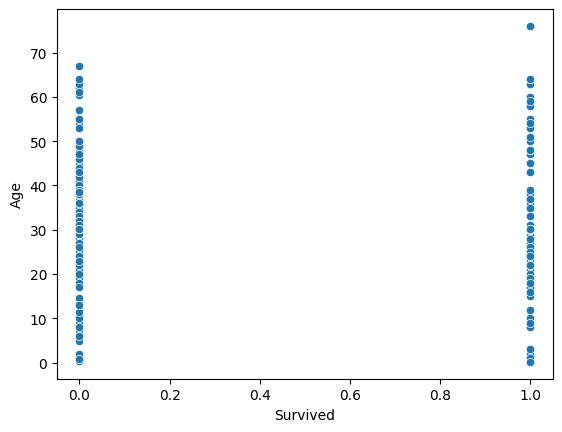

In [83]:
sns.scatterplot(x=df['Survived'] ,y=df['Age'])

<Axes: >

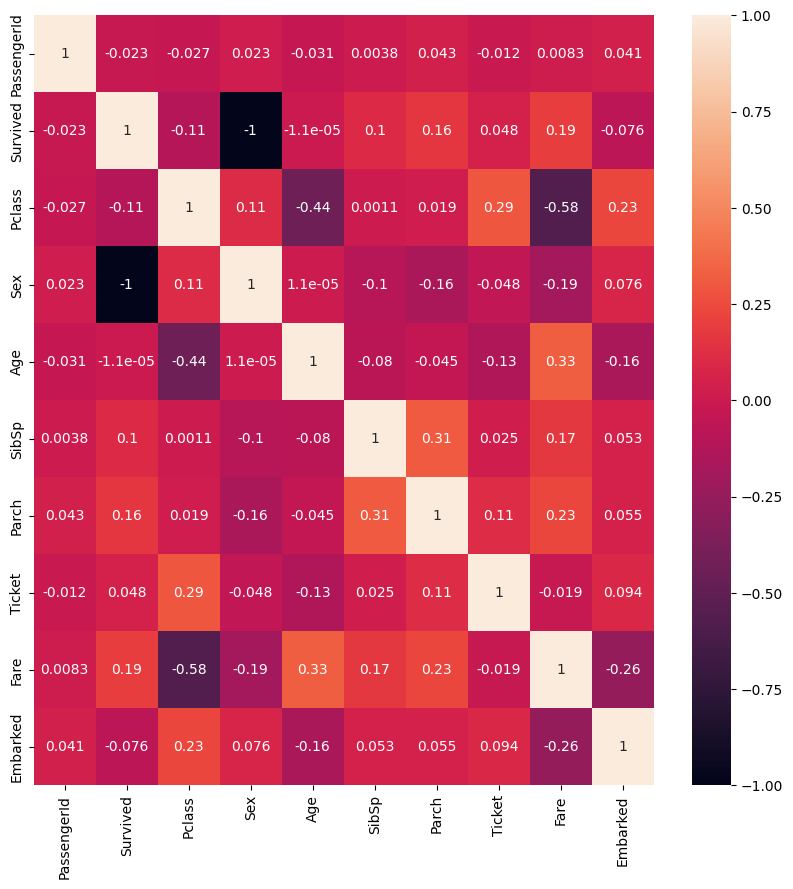

In [84]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr() , annot=True)

In [91]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [92]:
df

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,0,3,1,34.50000,0,0,152,7.8292,1
1,893,1,3,0,47.00000,1,0,221,7.0000,2
2,894,0,2,1,62.00000,0,0,73,9.6875,1
3,895,0,3,1,27.00000,0,0,147,8.6625,2
4,896,1,3,0,22.00000,1,1,138,12.2875,2
...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,1,30.27259,0,0,267,8.0500,2
414,1306,1,1,0,39.00000,0,0,324,108.9000,0
415,1307,0,3,1,38.50000,0,0,346,7.2500,2
416,1308,0,3,1,30.27259,0,0,220,8.0500,2


In [93]:
x_train

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
336,1228,2,1,32.00000,0,0,79,13.0000,2
31,923,2,1,24.00000,2,0,283,31.5000,2
84,976,2,1,30.27259,0,0,72,10.7083,1
287,1179,1,1,24.00000,1,0,52,82.2667,2
317,1209,2,1,19.00000,0,0,122,10.5000,2
...,...,...,...,...,...,...,...,...,...
71,963,3,1,21.00000,0,0,194,7.8958,2
106,998,3,1,21.00000,0,0,153,7.8208,1
270,1162,1,1,46.00000,0,0,33,75.2417,0
348,1240,2,1,24.00000,0,0,82,13.5000,2


In [94]:
scalar=StandardScaler().fit(x_train)

In [95]:
x_train =scalar.transform(x_train)
x_test =scalar.transform(x_test)

In [98]:
le= LogisticRegression()

In [99]:
le.fit(x_train , y_train)

LogisticRegression()

In [100]:
y_pred=le.predict(x_test)

In [101]:
y_pred

array([0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1])

In [103]:
score = accuracy_score(y_test , y_pred)
score

1.0

In [104]:
matrix=confusion_matrix(y_test , y_pred)
matrix

array([[50,  0],
       [ 0, 34]])

In [105]:
report=classification_report(y_test , y_pred)
print(report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       1.00      1.00      1.00        34

    accuracy                           1.00        84
   macro avg       1.00      1.00      1.00        84
weighted avg       1.00      1.00      1.00        84



In [106]:
from sklearn.ensemble import RandomForestRegressor

In [107]:
rfe=  RandomForestRegressor(n_estimators=100, random_state=42)

In [108]:
rfe.fit(x_train , y_train)

RandomForestRegressor(random_state=42)

In [110]:
p2=rfe.predict(x_test)
p2

array([0., 1., 0., 0., 1., 0., 1., 0., 1., 0., 0., 1., 1., 1., 0., 0., 1.,
       0., 0., 0., 0., 0., 1., 0., 1., 1., 1., 0., 0., 0., 0., 1., 1., 0.,
       1., 0., 1., 0., 1., 0., 1., 1., 0., 0., 0., 0., 1., 1., 1., 0., 0.,
       1., 1., 0., 0., 1., 0., 0., 1., 0., 0., 0., 1., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 1., 0., 0., 1., 0., 1.])

In [111]:
score = accuracy_score(y_test , y_pred)
score

1.0